<a href="https://colab.research.google.com/github/Zaedul-Islam/Introduction_to_Data_Visualization_in_Python/blob/master/3.%20Statistical%20plots%20with%20Seaborn/Statistical%20plots%20with%20Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Visualization in Python**

## **Statistical plots with Seaborn**


### **Exercise: Simple linear regressions**

As you have seen, seaborn provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a simple linear regression between two variables using sns.lmplot().

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column '`price`' vs the column '`area`' from a DataFrame df, you could call `sns.lmplot(x='area', y='price', data=df)`.

In this exercise, you will once again use the DataFrame auto containing the auto-mpg dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.




In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Reading the dataset
filepath = '/content/drive/My Drive/Colab Notebooks/DataCamp/Introduction to Data Visualization in Python/2. Plotting 2D arrays/Dataset/auto-mpg.csv'
dataset = pd.read_csv(filepath)

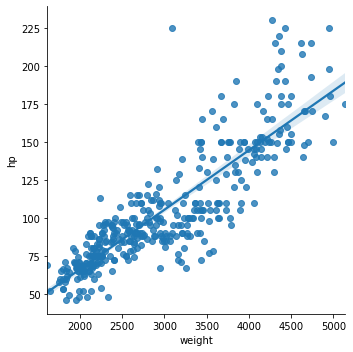

In [4]:
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x = 'weight', y ='hp', data =dataset)

# Display the plot
plt.show()

**Findings:**
1. Unsurprisingly, there is a strong correlation between '`hp`' and '`weight`', and a linear regression is easily able to capture this trend.

### **Exercise: Plotting residuals of a regression**

Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data. Seaborn provides `sns.residplot()` for that purpose, visualizing how far datapoints diverge from the regression line.

In this exercise, you will visualize the residuals of a regression between the '`hp`' column (horse power) and the '`mpg`' column (miles per gallon) of the `auto` DataFrame used previously.

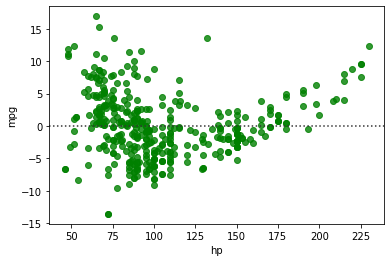

In [5]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x= 'hp', y = 'mpg', data = dataset, color ='green')

# Display the plot
plt.show()
